# Business Understanding

# Data Understanding

In [74]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
%matplotlib inline

In [75]:
df=pd.read_csv('Data/AviationData.csv', encoding='latin-1', low_memory=False)

C:\Users\hrcoh\AppData\Local\Temp\ipykernel_13936\2555783615.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Data/AviationData.csv', encoding='latin-1')


In [76]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [77]:
#Explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [78]:
#Explore summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [79]:
#Looking at unique values in the columns that I don't fully understand
print(df['Amateur.Built'].unique(),'\n')
print(df['FAR.Description'].unique(),'\n')
print(df['Schedule'].unique(),'\n')
print(df['Report.Status'].unique(),'\n')
print(df['Registration.Number'].unique(),'\n')
print(df['Aircraft.damage'].unique(),'\n')
print(df['Engine.Type'].unique(),'\n')
print(df['Aircraft.Category'].unique())

['No' 'Yes' nan] 

[nan 'Part 129: Foreign' 'Part 91: General Aviation'
 'Part 135: Air Taxi & Commuter' 'Part 125: 20+ Pax,6000+ lbs'
 'Part 121: Air Carrier' 'Part 137: Agricultural'
 'Part 133: Rotorcraft Ext. Load' 'Unknown' 'Part 91F: Special Flt Ops.'
 'Non-U.S., Non-Commercial' 'Public Aircraft' 'Non-U.S., Commercial'
 'Public Use' 'Armed Forces' 'Part 91 Subpart K: Fractional' '091' 'NUSC'
 '135' 'NUSN' '121' '137' '129' '133' '091K' 'UNK' 'PUBU' 'ARMF' '103'
 '125' '437' '107'] 

[nan 'SCHD' 'NSCH' 'UNK'] 

['Probable Cause' 'Factual' 'Foreign' ...
 'The pilot did not ensure adequate clearance from construction vehicles during taxi.'
 'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.'
 'The pilot\x92s loss of control due to a wind g

For our analysis, we can drop FAR Description, Schedule, and Registration Number. Report Status. Amateur Built, Aircraft Category, Engine Type and Aircraft Damage may be helpful.

In [80]:
#Understanding differences bewteen injury columns
print(df['Injury.Severity'].unique(),'\n')
print(df['Total.Fatal.Injuries'].unique(),'\n')
print(df['Total.Serious.Injuries'].unique(),'\n')
print(df['Total.Minor.Injuries'].unique(),'\n')
print(df['Total.Uninjured'].unique())

['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)' 'Fatal(97)'
 'Fatal(349)' 'Fatal(125)' 'Fatal(35)' 'Fatal(228)' 'Fatal(75)'
 'Fatal(104)' 'Fatal(229)' 'Fatal(80)' 'Fatal(217)' 'Fatal(169)'
 'Fatal(88)' 'Fatal(19)' 'Fatal(60)' 'Fatal(113)' 'Fatal(143)' 'Fatal(83)'
 'Fatal(24)' 'Fatal(44)' 'Fatal(64)' 'Fatal(92

### Data Understanding Summary

There are 31 columns and 88889 rows.

These are some areas we'll consider cleaning or analyzing:

Injury Severity gives us similar information to Total Fatal Injuries, Serious Injuries, Minor Injuries, and Uninjured. We may consider splitting Injury Severity so it just has the word classification and the number of injuries will be kept in the other columns.

Unknown: There are values included in some columns like 'Unknown, UNK, and Unavailable that are the same thing as Nan. We will note this for later.

Ensure data types are correct for each column.

Ensure there are no duplicates and that value formatting is standardized.

Drop columns that do not give us relevant information.

## Data Preparation

In [81]:
df_copy = df.copy()

In [82]:
#Change date column to datetime data type
df['Event.Date']=pd.to_datetime(df['Event.Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [83]:
#Check for duplicates
df.duplicated().any()

False

In [84]:
#Checking for Missing Data or Nulls
df.isna().any()

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b

In [85]:
#Checking how many nulls in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [86]:
#Checking what percentage of each column is null
df.isnull().sum()/df.shape[0]*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

Let's drop all columns with over 30% null or missing data. Here are the columns that have too many nulls values or are irrelevant to the current business question: Latitude, Longitude, Airport Code, Airport Name, Registration Number, FAR Description, Schedule, Air Carrier, and Publication Date.

In [87]:
#Drop columns with too many missing values or irrevlant to our business question
dropped_columns=['Schedule', 'Air.carrier', 'Longitude','Latitude','Registration.Number','Purpose.of.flight','Publication.Date', 'Airport.Code','Airport.Name', 'FAR.Description', 'Broad.phase.of.flight']
df=df.drop(dropped_columns, axis=1)

In [88]:
#confirming the columns were dropped
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Report.Status'],
      dtype='object')

In [89]:
#Clean Injury Severity Column so it does not include the paranthesis since the exact number of injuries is included in the other columns.
df['Injury.Severity']=df['Injury.Severity'].str.split('(').str[0]
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Probable Cause


In [90]:
#Change Unknown, UNK, and Unavailable to Nan.
df.replace(['Unknown','UNK','Unavailable'],np.nan, inplace=True)

In [91]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Report.Status'],
      dtype='object')

In [92]:
#Change column names
rename_columns= {'Event.Id':'ID', 'Investigation.Type':'Type', 'Accident.Number':'Accident_Number', 'Event.Date':'Date',
    'Injury.Severity':'Injury_Severity', 'Aircraft.Category':'Category','Aircraft.damage':'Damage','Amateur.Built':'Amateur_Built',
       'Number.of.Engines':'Engines', 'Engine.Type':'Engine_Type',
     'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
       'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',
       'Broad.phase.of.flight':'Flight_Phase', 'Report.Status':'Report_Status'}
df=df.rename(columns=rename_columns)

In [93]:
df.isnull().sum()/df.shape[0]*100

ID                   0.000000
Type                 0.000000
Accident_Number      0.000000
Date                 0.000000
Location             0.059625
Country              0.257625
Injury_Severity      1.232998
Damage               3.727120
Category            63.695170
Make                 0.094500
Model                0.108000
Amateur_Built        0.114750
Engines              6.844491
Engine_Type         10.291487
Fatal_Injuries      12.826109
Serious_Injuries    14.073732
Minor_Injuries      13.424608
Uninjured            6.650992
Weather              6.016492
Report_Status        7.181991
dtype: float64

Now we'll clean the Country and Location columns. 

In [94]:
#Checking what percentage of values are in each country
df['Country'].value_counts()/(len(df['Country']))

Country
United States                       0.925289
Brazil                              0.004207
Canada                              0.004039
Mexico                              0.004027
United Kingdom                      0.003870
                                      ...   
Seychelles                          0.000011
Palau                               0.000011
Libya                               0.000011
Saint Vincent and the Grenadines    0.000011
Turks and Caicos Islands            0.000011
Name: count, Length: 218, dtype: float64

Almost 93% of these reported accidents occurred in the United States so we will focus our analysis on accidents in the USA. We will drop rows with accidents outside the USA mainland.   

In [95]:
df.drop(df[df.Country != 'United States'].index, inplace=True)

In [96]:
df['Country'].value_counts()

Country
United States    82248
Name: count, dtype: int64

In [97]:
#Split location into into city and state
df['City']=df['Location'].str.split(',').str[0]
df['State']=df['Location'].str.split(',').str[-1]

In [98]:
#Drop Location column
df=df.drop('Location',axis=1)
df.head()

,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Category,Make,Model,...,Engines,Engine_Type,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Report_Status,City,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,NaN,Stinson,108-3,...,1.0,Reciprocating,2.0,0.0,0.0,0.0,NaN,Probable Cause,MOOSE CREEK,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,NaN,Piper,PA24-180,...,1.0,Reciprocating,4.0,0.0,0.0,0.0,NaN,Probable Cause,BRIDGEPORT,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,NaN,Cessna,172M,...,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Probable Cause,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,NaN,Rockwell,112,...,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Probable Cause,EUREKA,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,NaN,Cessna,501,...,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Probable Cause,Canton,OH


In [99]:
#Standardize data from all caps
df['Make']=df['Make'].str.title()
df['City']=df['City'].str.title()
df.head()

,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Category,Make,Model,...,Engines,Engine_Type,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Report_Status,City,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,NaN,Stinson,108-3,...,1.0,Reciprocating,2.0,0.0,0.0,0.0,NaN,Probable Cause,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,NaN,Piper,PA24-180,...,1.0,Reciprocating,4.0,0.0,0.0,0.0,NaN,Probable Cause,Bridgeport,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,NaN,Cessna,172M,...,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Probable Cause,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,NaN,Rockwell,112,...,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Probable Cause,Eureka,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,NaN,Cessna,501,...,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Probable Cause,Canton,OH


In [100]:
# Clean 'Make' Column. Remove spaces.
df['Make'].str.strip()
df['Make'].duplicated().value_counts()

Make
True     74843
False     7405
Name: count, dtype: int64

Why are some values showing up multiple times? For example Piper and Cessena.

In [101]:
#seperate models from aircraft type
df['Model'].value_counts()

Model
152               2323
172               1637
172N              1136
PA-28-140          910
150                790
                  ... 
2180A                1
B206-BIII            1
THORP T18CWS         1
AVRO 146-RJ70A       1
PA42                 1
Name: count, Length: 11441, dtype: int64

In [102]:
df.Make.value_counts()

Make
Cessna                   25853
Piper                    14168
Beech                     5059
Bell                      2285
Boeing                    1485
                         ...  
Arthur P. Matthews           1
Tolle                        1
Harwell/Gardner              1
Galaxy Balloons, Inc.        1
Royse Ralph L                1
Name: count, Length: 7404, dtype: int64

In [103]:
df.head()

,ID,Type,Accident_Number,Date,Country,Injury_Severity,Damage,Category,Make,Model,...,Engines,Engine_Type,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Report_Status,City,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,NaN,Stinson,108-3,...,1.0,Reciprocating,2.0,0.0,0.0,0.0,NaN,Probable Cause,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,NaN,Piper,PA24-180,...,1.0,Reciprocating,4.0,0.0,0.0,0.0,NaN,Probable Cause,Bridgeport,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,NaN,Cessna,172M,...,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Probable Cause,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,NaN,Rockwell,112,...,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Probable Cause,Eureka,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,NaN,Cessna,501,...,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Probable Cause,Canton,OH


In [104]:
#Cleaning Model Column. Start by looking at top 50 values
df.Model.value_counts().head(50)

Model
152           2323
172           1637
172N          1136
PA-28-140      910
150            790
172M           773
172P           680
180            617
182            589
PA-18-150      578
PA-18          578
150M           578
PA-28-180      567
PA-28-161      556
PA-28-181      516
206B           462
PA-38-112      460
G-164A         460
150L           452
A36            434
G-164B         416
140            400
170B           387
172S           368
PA-24-250      348
182P           347
PA-32-300      339
PA-28R-200     327
PA-12          323
269C           320
A188B          307
7AC            295
177            289
206            283
PA-22-150      280
185            278
A185F          277
7GCBC          277
M20J           277
7ECA           267
182Q           262
150F           262
PA-23-250      259
PA-31-350      251
PA-25-235      251
150H           243
SR22           240
150G           240
172RG          237
T210N          235
Name: count, dtype: int64

Many models start with the same number like 172, 150, 206, and 182 are followed by other letters. Let's group some of the more commonly occuring numbers in case we want to use this for future analysis.

In [105]:
#Create simplified model column
df['Model_Simplified']=df['Model'].str.slice(0,3)

Let's also create a combined Make and Model column for future analysis.

In [106]:
#Create combined make model column
df['Make_Model']=df['Make']+'-'+df['Model']

### Limiting Data for Better Comparison
We are still left needing a way to compare "like" with "like". To make the safety data points more comprable, we will limit this analysis to airplane with fewer than 20 passengers.

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82248 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                82248 non-null  object        
 1   Type              82248 non-null  object        
 2   Accident_Number   82248 non-null  object        
 3   Date              82248 non-null  datetime64[ns]
 4   Country           82248 non-null  object        
 5   Injury_Severity   82125 non-null  object        
 6   Damage            80219 non-null  object        
 7   Category          28150 non-null  object        
 8   Make              82206 non-null  object        
 9   Model             82206 non-null  object        
 10  Amateur_Built     82227 non-null  object        
 11  Engines           80373 non-null  float64       
 12  Engine_Type       77820 non-null  object        
 13  Fatal_Injuries    71594 non-null  float64       
 14  Serious_Injuries  70873 non

In [108]:
#Create column for total passengers on board.
df['Total_Passengers']=df['Fatal_Injuries']+df['Serious_Injuries']+df['Minor_Injuries']+df['Uninjured']

In [109]:
#Limit dataset to airplanes with fewer than 20 passengers
df=df[(df['Total_Passengers']<=20) & (df['Category']=='Airplane')]

In [110]:
#Removing amateur built planes
df=df[(df['Amateur_Built']=='No')]

### Dates

Text(0.5, 1.0, 'Investigations by Date')

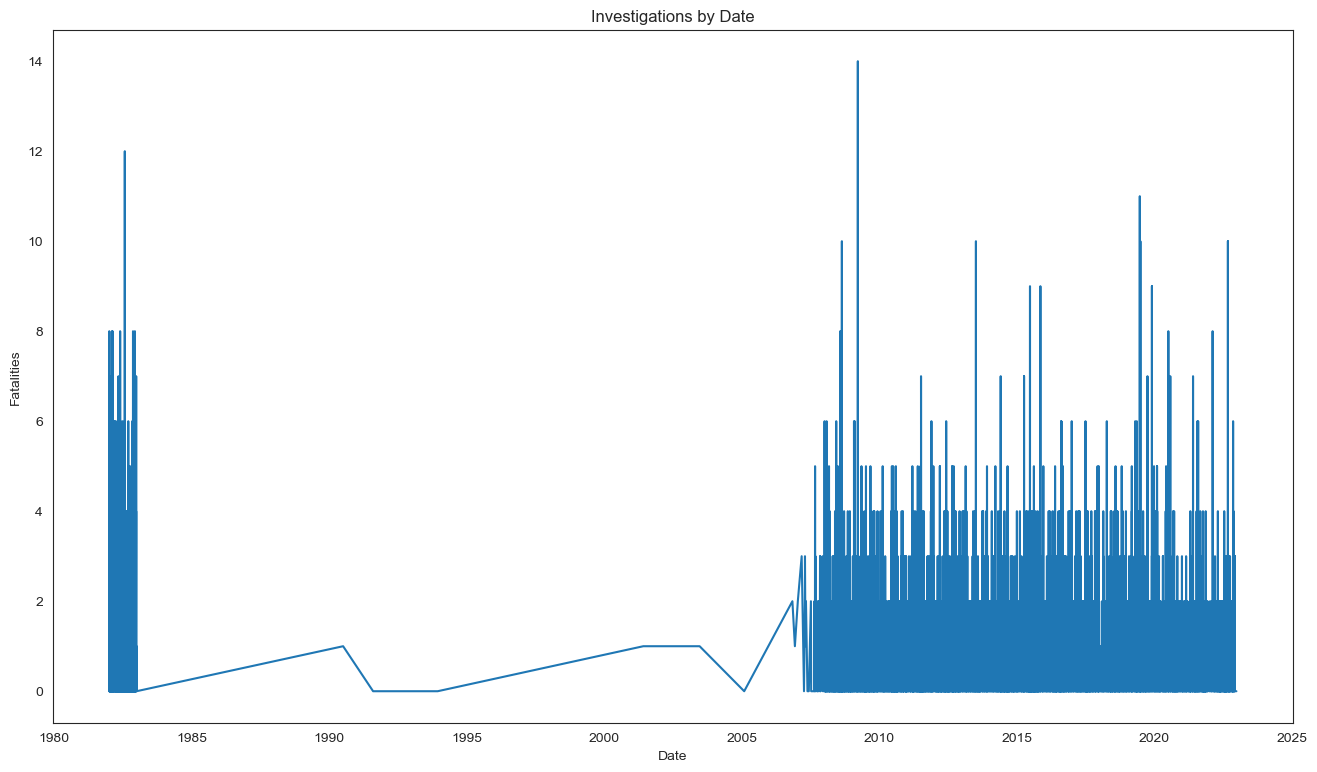

In [111]:
#Fatal Injuries by Year
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(df['Date'], df['Fatal_Injuries'])
ax.set_xlabel('Date')
ax.set_ylabel('Fatalities')
ax.set_title('Investigations by Date')

Text(0, 0.5, 'Number of Fatalities')

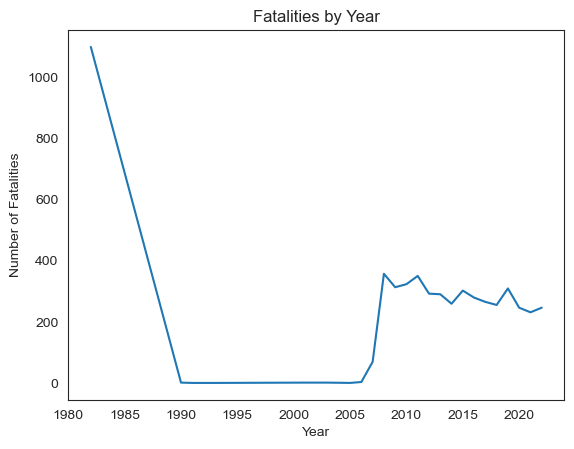

In [112]:
df_year=df.groupby(df['Date'].dt.year)['Fatal_Injuries'].sum()
df_year.head()

plt.plot(df_year)
plt.title('Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')

In [113]:
#Limited dataset to only be 2000 onward
df=df[(df['Date'].dt.year>=2000)]

### Final Cleaning to eliminate null values


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14967 entries, 50682 to 88886
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                14967 non-null  object        
 1   Type              14967 non-null  object        
 2   Accident_Number   14967 non-null  object        
 3   Date              14967 non-null  datetime64[ns]
 4   Country           14967 non-null  object        
 5   Injury_Severity   14886 non-null  object        
 6   Damage            14761 non-null  object        
 7   Category          14967 non-null  object        
 8   Make              14966 non-null  object        
 9   Model             14967 non-null  object        
 10  Amateur_Built     14967 non-null  object        
 11  Engines           14525 non-null  float64       
 12  Engine_Type       13405 non-null  object        
 13  Fatal_Injuries    14967 non-null  float64       
 14  Serious_Injuries  14967

In [115]:
#Percentage of null values in each column
print((df.isnull().sum()/df.shape[0]*100))

ID                   0.000000
Type                 0.000000
Accident_Number      0.000000
Date                 0.000000
Country              0.000000
Injury_Severity      0.541191
Damage               1.376361
Category             0.000000
Make                 0.006681
Model                0.000000
Amateur_Built        0.000000
Engines              2.953164
Engine_Type         10.436293
Fatal_Injuries       0.000000
Serious_Injuries     0.000000
Minor_Injuries       0.000000
Uninjured            0.000000
Weather              2.425336
Report_Status       12.420659
City                 0.000000
State                0.000000
Model_Simplified     0.000000
Make_Model           0.006681
Total_Passengers     0.000000
dtype: float64


The fields that have null values are Injury Severity, Damage, Make, Engine_Type, Weather, and Report Status. All are under 13% so let's eliminate rows with null values.

In [116]:
##Drop Report Status
df=df.drop(['Report_Status'],axis=1)

In [117]:
#Drop some rows with missing data
df.dropna(inplace=True)

In [118]:
#Confirming there is no missing data
df.isnull().sum()

ID                  0
Type                0
Accident_Number     0
Date                0
Country             0
Injury_Severity     0
Damage              0
Category            0
Make                0
Model               0
Amateur_Built       0
Engines             0
Engine_Type         0
Fatal_Injuries      0
Serious_Injuries    0
Minor_Injuries      0
Uninjured           0
Weather             0
City                0
State               0
Model_Simplified    0
Make_Model          0
Total_Passengers    0
dtype: int64

In [119]:
#Confirming how many rows we are left with
df.shape

(12917, 23)

We are left with 14,967 entries and 16 columns.

## Data Preparation Summary

Here is a recap of the steps we took for data preparation:

- Changed Event Date to datetime format.
- Checked for duplicates.
- Checked for null values and decided to drop columns that contained over 30% null values.
- Dropped columns that we did not need for this partifcular analysis.
- Split Injury Severity column to only contain the first word since the exact number is contained in the other columns.
- Renamed columns to simplify analyses.
- Replaced variations of value Unknown with a standardized version.
- Limited data set to just USA.
- Split location into city and state columns.
- Create simplified Model column containing zero to three digits or letters of Model to contain larger groups of Models and give us the ability to drill down if needed.
- Created column with total number of passengers.
- Limited data to Airplanes with fewer than 20 passengers
- Limited data to exclude amateur-built airplanes
- Limited data to exclude entries from after the year 2000.
- Dropped Report Status column
- Dropped rest of the null values.

In [120]:
df.to_csv('aviation.csv')

# Exploratory Data Analysis

import seaborn as sns

In [121]:
import seaborn as sns

## Exploring Engines

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12917 entries, 50682 to 88767
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                12917 non-null  object        
 1   Type              12917 non-null  object        
 2   Accident_Number   12917 non-null  object        
 3   Date              12917 non-null  datetime64[ns]
 4   Country           12917 non-null  object        
 5   Injury_Severity   12917 non-null  object        
 6   Damage            12917 non-null  object        
 7   Category          12917 non-null  object        
 8   Make              12917 non-null  object        
 9   Model             12917 non-null  object        
 10  Amateur_Built     12917 non-null  object        
 11  Engines           12917 non-null  float64       
 12  Engine_Type       12917 non-null  object        
 13  Fatal_Injuries    12917 non-null  float64       
 14  Serious_Injuries  12917

In [123]:
df.Engines.value_counts()

Engines
1.0    11516
2.0     1374
4.0       17
3.0        8
0.0        1
8.0        1
Name: count, dtype: int64

Text(0, 0.5, 'Number of Accidents')

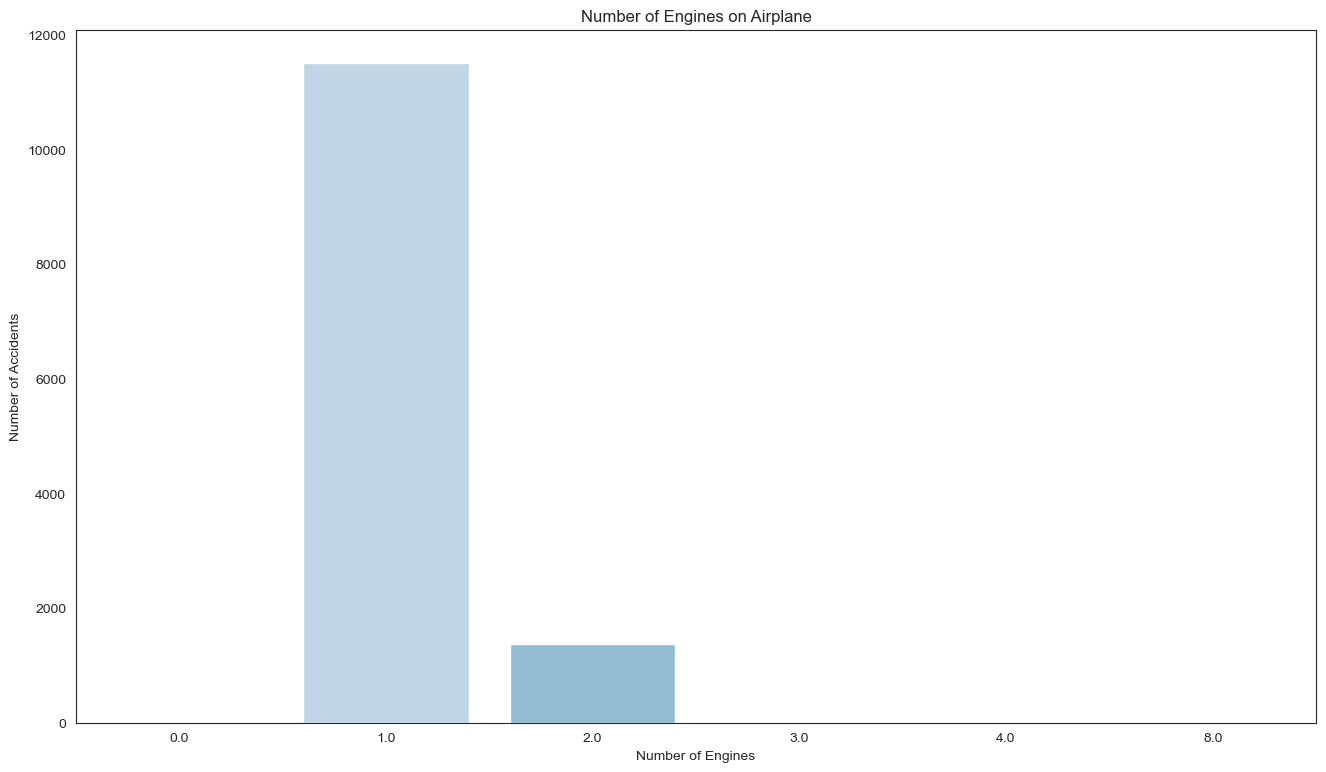

In [124]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
engines=sns.barplot(x=df['Engines'].value_counts().index, y=df['Engines'].value_counts().values,data=df, palette='Blues')
engines.set_title('Number of Engines on Airplane')
engines.set_xlabel('Number of Engines')
engines.set_ylabel('Number of Accidents')

It makes sense that the most aircraft involved in incidents in our dataset only had one engine. That means there is no other engine to rely on if one fails and there is less time for an emergency landing.

In [125]:
#Exploring Engine Types
df['Engine_Type'].value_counts()

Engine_Type
Reciprocating    11768
Turbo Prop         886
Turbo Fan          191
Turbo Jet           63
Turbo Shaft          5
Electric             4
Name: count, dtype: int64

Text(0, 0.5, 'Number of Accidents')

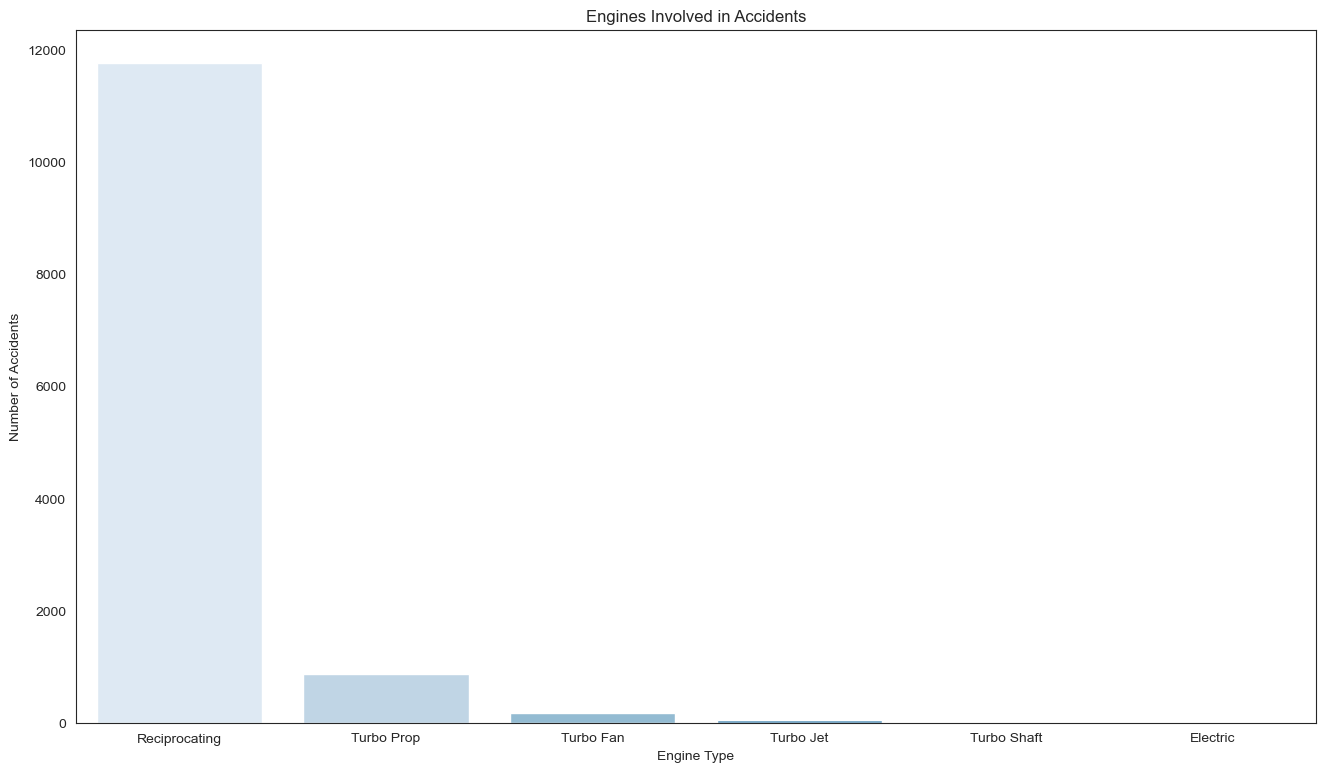

In [126]:
#Plotting Engine Types
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
engines=sns.barplot(x=df['Engine_Type'].value_counts().index, y=df['Engine_Type'].value_counts().values,data=df, palette='Blues')
engines.set_title('Engines Involved in Accidents')
engines.set_xlabel('Engine Type')
engines.set_ylabel('Number of Accidents')

Looks like Reciprocating Engines are involved in the most crashes. Let's filter aircraft with zero and one engine out of the dataset and see if this result changes.

In [127]:
df_subset=df[df['Engines']>=2]
df_subset.Engines.value_counts()

Engines
2.0    1374
4.0      17
3.0       8
8.0       1
Name: count, dtype: int64

Text(0, 0.5, 'Number of Accidents')

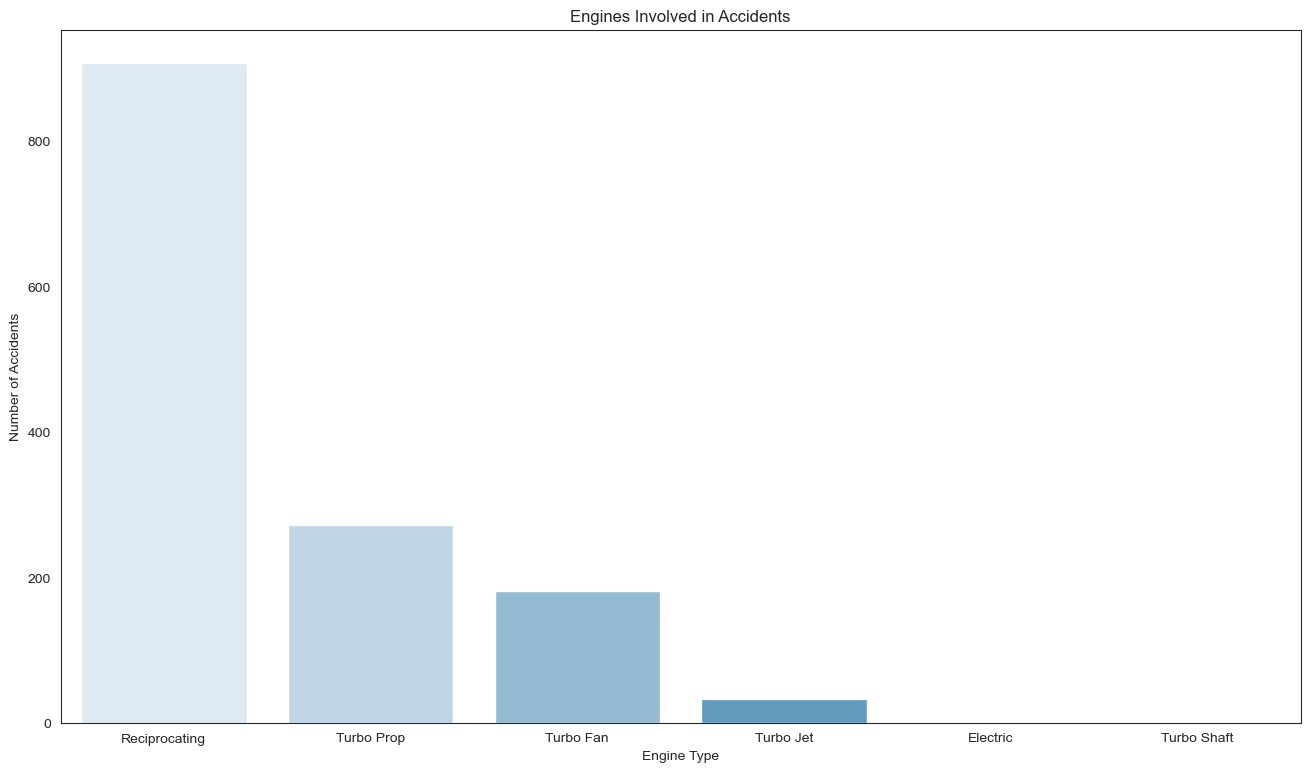

In [128]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
engines=sns.barplot(x=df_subset['Engine_Type'].value_counts().index, y=df_subset['Engine_Type'].value_counts().values,data=df_subset, palette='Blues')
engines.set_title('Engines Involved in Accidents')
engines.set_xlabel('Engine Type')
engines.set_ylabel('Number of Accidents')

Reciprocating still seems to be involved in the most crashes, but there is not as a drastic of a difference between Reciprocating and Turbo Fan now. Although it still seems that reciprocating engines are involved in the most accidents, so let's filter them out.

In [129]:
df_subset=df_subset[df_subset['Engine_Type']!='Reciprocating']
df_subset.Engine_Type.value_counts()

Engine_Type
Turbo Prop     273
Turbo Fan      182
Turbo Jet       34
Electric         2
Turbo Shaft      1
Name: count, dtype: int64

In [130]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 58138 to 88158
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                492 non-null    object        
 1   Type              492 non-null    object        
 2   Accident_Number   492 non-null    object        
 3   Date              492 non-null    datetime64[ns]
 4   Country           492 non-null    object        
 5   Injury_Severity   492 non-null    object        
 6   Damage            492 non-null    object        
 7   Category          492 non-null    object        
 8   Make              492 non-null    object        
 9   Model             492 non-null    object        
 10  Amateur_Built     492 non-null    object        
 11  Engines           492 non-null    float64       
 12  Engine_Type       492 non-null    object        
 13  Fatal_Injuries    492 non-null    float64       
 14  Serious_Injuries  492 non

## Exploring Makes

Text(0, 0.5, 'Number of Accidents')

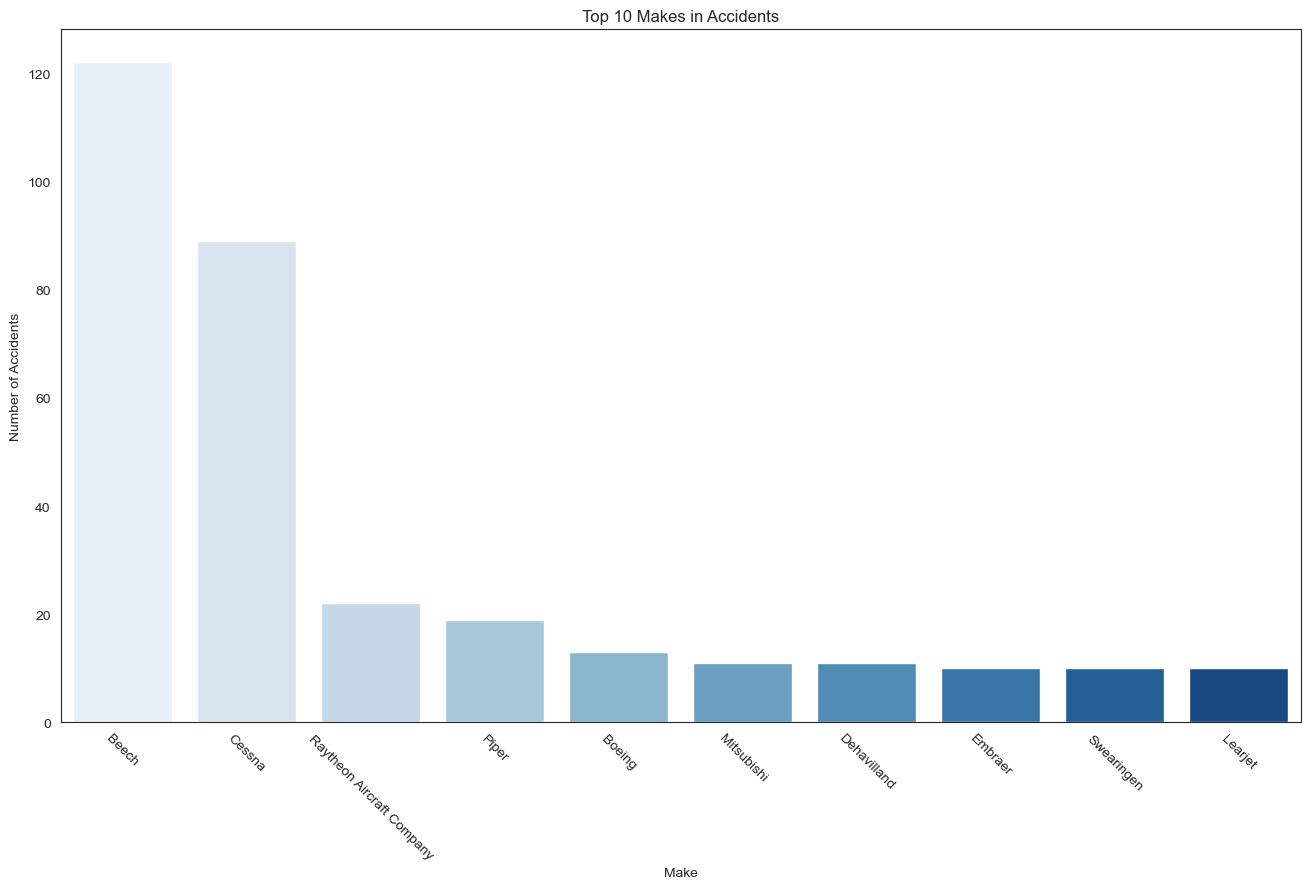

In [131]:
#Showing Top Makes Involved in Accidents
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('white')
df_make=sns.barplot(data=df_subset, x=df_subset.Make.value_counts().index[:10], y=df_subset.Make.value_counts().values[:10], palette='Blues')
df_make.set_title('Top 10 Makes in Accidents')
df_make.set_xlabel('Make')
df_make.set_xticklabels(df_subset.Make.value_counts().index[:10], rotation=-45)
df_make.set_ylabel('Number of Accidents')

In [132]:
#Grouping Top 10 Makes by Fatal and Nonfatal
grouped_make=df_subset.groupby(['Make','Injury_Severity']).size().unstack().sort_values(by='Non-Fatal', ascending=False).head(10)
print(grouped_make)

Injury_Severity            Fatal  Non-Fatal
Make                                       
Beech                       24.0       98.0
Cessna                      21.0       68.0
Raytheon Aircraft Company    3.0       19.0
Boeing                       1.0       12.0
Swearingen                   NaN       10.0
Embraer                      1.0        9.0
Dehavilland                  3.0        8.0
Piaggio                      NaN        8.0
Piper                       11.0        8.0
Mitsubishi                   3.0        8.0


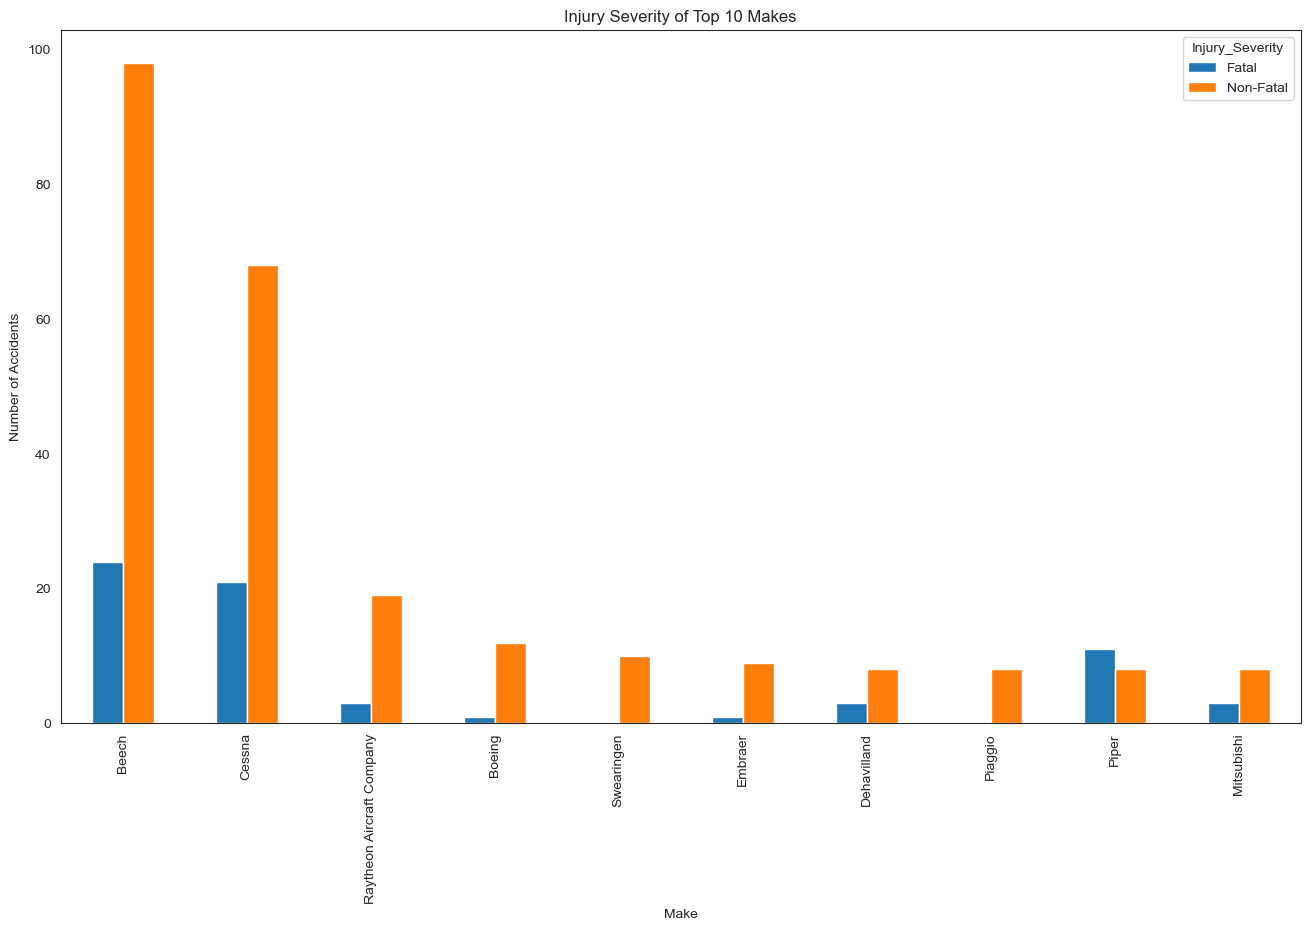

In [133]:
grouped_make.plot(kind='bar',stacked=False, figsize=(16,9))
plt.ylabel('Number of Accidents')
plt.title('Injury Severity of Top 10 Makes')
plt.show()

## Exploring Make and Model

In [134]:
df_subset.Make_Model.value_counts()

Make_Model
Beech-200                16
Cessna-550               15
Beech-C90                12
Cessna-525               10
Cessna-560                9
                         ..
Gulfstream-GVI            1
Beech-BE99                1
Beech-90B                 1
Bombardier-BD700 1A10     1
Bombardier-BD100 1A10     1
Name: count, Length: 254, dtype: int64

In [135]:
#Grouping Top 10 Models by Fatal and Nonfatal
grouped_makemodel=df_subset.groupby(['Make_Model','Injury_Severity']).size().unstack().sort_values(by='Non-Fatal', ascending=False).head(10)
print(grouped_makemodel)

Injury_Severity                 Fatal  Non-Fatal
Make_Model                                      
Cessna-550                        NaN       15.0
Beech-200                         4.0       12.0
Beech-C90                         2.0       10.0
Cessna-560XL                      NaN        9.0
Beech-B200                        NaN        7.0
Cessna-560                        2.0        7.0
Piaggio-P180                      NaN        5.0
Raytheon Aircraft Company-B200    NaN        5.0
Beech-1900C                       3.0        5.0
Raytheon Aircraft Company-400A    NaN        5.0


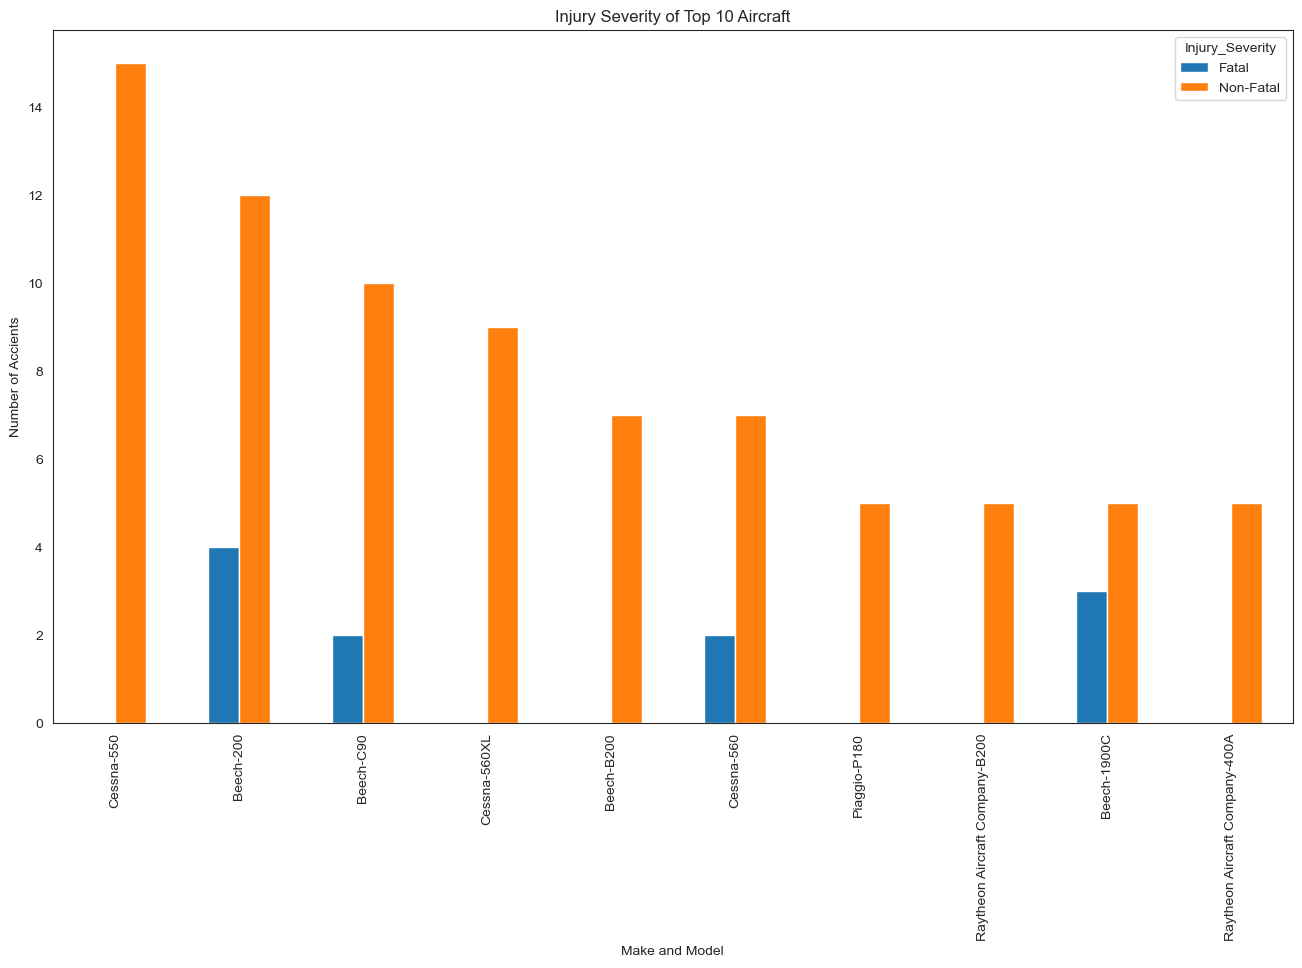

In [136]:
grouped_makemodel.plot(kind='bar',stacked=False, figsize=(16,9))
plt.xlabel('Make and Model')
plt.ylabel('Number of Accients')
plt.title('Injury Severity of Top 10 Aircraft')
plt.show()

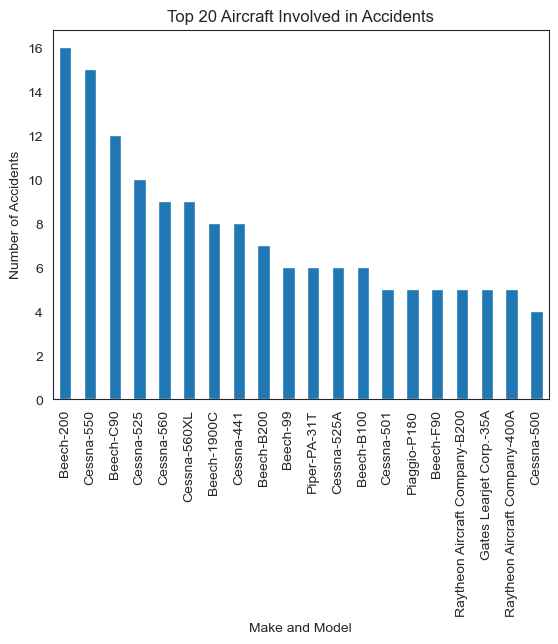

In [137]:
df_subset['Make_Model'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Make and Model')
plt.ylabel('Number of Accidents')
plt.title('Top 20 Aircraft Involved in Accidents')
plt.show()

In [138]:
df_subset['Make_Model'].value_counts().tail(50)

Make_Model
Morane-Saulnier-MS-760/B                   1
Fairchild-SW3                              1
Convair-CV-580                             1
Bombardier Inc-BD-100-1A10                 1
Mitsubishi-MU-2B-26A                       1
Beech-C90 - A                              1
Mitsubishi-MU-2B-25                        1
Learjet Inc-31A                            1
Embraer-EMB120                             1
Bombardier Learjet Corp.-35A               1
Rockwell International-690C                1
Short Bros. & Harland-SC7 SERIES 3         1
Short Bros-SHORTS SD3-60                   1
Beech-400A                                 1
Raytheon Aircraft Company-C90GT            1
British Aerospace-BAE JETSTREAM 3101       1
Rockwell International-690A                1
Learjet-36A                                1
Mcdonnell Douglas-MD-11F                   1
Beech-390                                  1
Hawker Beechcraft Corporation-390          1
Hawker Beechcraft-B200GT                   1

Beech and Cessna are involved in the most accidents.

## Exploring Locations

In [139]:
grouped_location=df_subset.groupby(['State','Injury_Severity']).size().unstack()
print(grouped_location)

Injury_Severity  Fatal  Non-Fatal
State                            
 AK                2.0       23.0
 AL                2.0        4.0
 AO                2.0        NaN
 AR                1.0        2.0
 AZ                3.0       11.0
 CA                4.0       36.0
 CO                2.0       20.0
 CT                1.0        2.0
 FL                6.0       30.0
 GA                9.0       11.0
 HI                2.0        2.0
 IA                1.0        6.0
 ID                NaN        5.0
 IL                3.0       13.0
 IN                3.0       10.0
 KS                1.0        1.0
 KY                NaN        3.0
 LA                3.0        1.0
 MA                2.0        3.0
 MD                1.0        3.0
 ME                1.0        1.0
 MI                2.0        8.0
 MN                1.0        8.0
 MO                1.0       11.0
 MS                1.0        3.0
 MT                3.0        4.0
 NC                2.0        8.0
 ND           

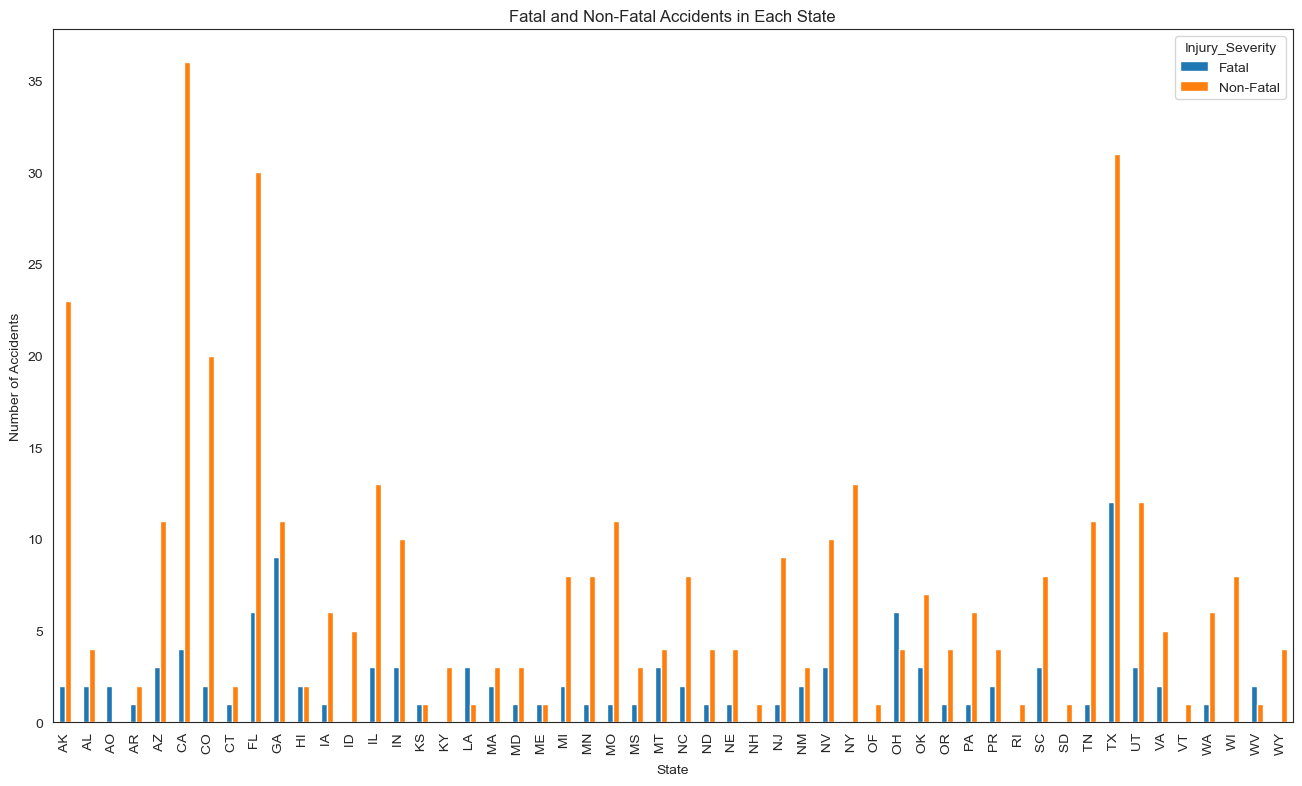

In [140]:
grouped_location.plot(kind='bar',stacked=False, figsize=(16,9))
plt.ylabel('Number of Accidents')
plt.title('Fatal and Non-Fatal Accidents in Each State')
plt.show()

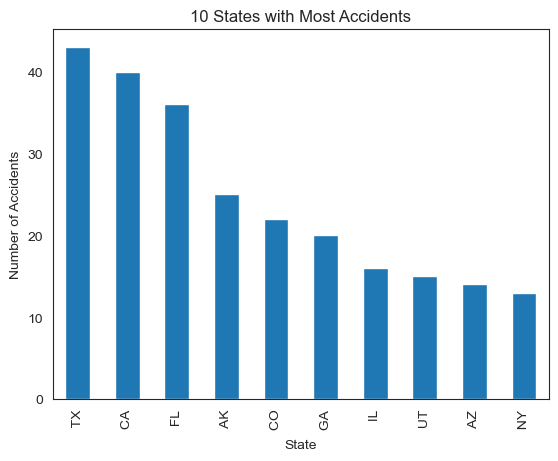

In [141]:
#Plotting 10 states with the most Accidents
df_subset.State.value_counts().head(10).plot(kind='bar')
plt.ylabel('Number of Accidents')
plt.title('10 States with Most Accidents')
plt.show()

Texas, California, and Florida seem to have the most accidents in them. I don't think this is a particularly significant finding though as they are some of the most highly populated states in the USA so it is probably because the total number of flights is higher in those states to begin with.}

## Exploring Accidents by Month

In [142]:
df_subset['Month'] = pd.DatetimeIndex(df_subset['Date']).month

In [143]:
import calendar
df_subset['Month'] = df_subset['Month'].apply(lambda x: calendar.month_abbr[x])

In [144]:
df_subset['Month'].value_counts()

Month
Feb    58
Jun    50
Mar    46
May    45
Dec    45
Jan    41
Sep    38
Apr    36
Aug    35
Oct    34
Nov    32
Jul    32
Name: count, dtype: int64

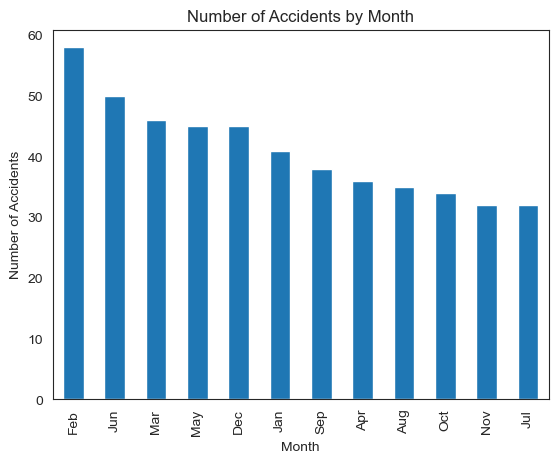

In [145]:
df_subset['Month'].value_counts().plot(kind='bar')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Month')
plt.show()

Although there the most accidents occurred in February, there doesn't seem to be a specific pattern or season that emerges as the most dangerous.

In [146]:
#Exporting filtered data set
df_subset.to_csv('aviation_subset.csv')

# Conclusions

## Limitations

The analysis above has the following limitations:
1. Limited to the United States.
2. Limited to accidents reported in the the Aviation Accident Database & Synopses.
3. This analysis excludes Amateur Built aircraft and incidents before the year 2000. Use the  Aviation Accident Database & Synopses dataset. The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

## Recommendations

### Engine
* It is not recommended to buy planes with less than two engines because it is smart to have a backup engine if one fails.
* Avoid reciprocating engines as they are associated with the most accidents.

### Make and Model
* Beech and Cessna are the makes of the airplanes with the most accidents. 
* Specifically, the Beech-200, Cessna-550, and Beech-C90 are the private aircrafts with the most accidents.



## Next Steps

1. The main source of data for this analysis was an accident database which is a specific set of information that is going to include “riskier” investments by the nature of the database. I recommend exploring other data points that will also inform this investment decision such as market share, reviews, awards, and data from outside the US.
2. To explore potential commercial aircraft investments, find a dataset that contains more information on commercial planes as this may yield more robust results in this category. Further research is required. 
